## Large-scale CelebFaces Attributes (CelebA) Dataset
https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html

- CelebFaces Attributes Dataset (CelebA) is a large-scale face attributes dataset with more than 200K celebrity images, each with 40 attribute annotations. The images in this dataset cover large pose variations and background clutter. CelebA has large diversities, large quantities, and rich annotations, including

  - 10,177 number of identities,

  - 202,599 number of face images, and

  - 5 landmark locations, 40 binary attributes annotations per image.

- The dataset can be employed as the training and test sets for the following computer vision tasks: face attribute recognition, face recognition, face detection, landmark (or facial part) localization, and face editing & synthesis.


In [1]:
using TestImages, Images, FileIO, Colors

## Read MRI image file

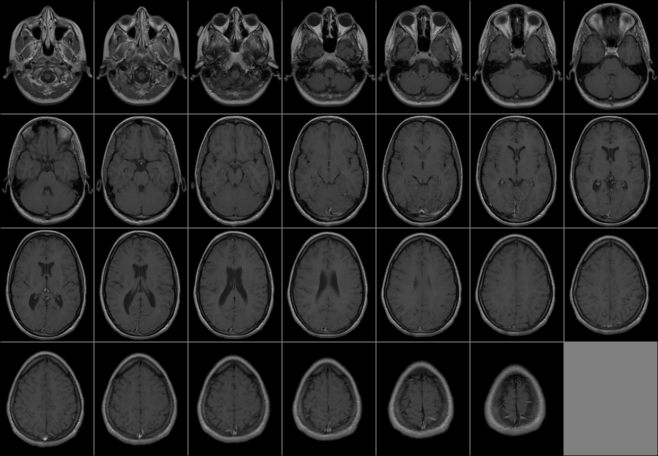

In [2]:
img = testimage("mri-stack") # 226×186×27 Gray image
mosaicview(img; fillvalue=0.5, npad=2, ncol=7, rowmajor=true)

In [3]:
typeof(img)

AxisArray{Gray{N0f8}, 3, Array{Gray{N0f8}, 3}, Tuple{Axis{:P, StepRange{Int64, Int64}}, Axis{:R, StepRange{Int64, Int64}}, Axis{:S, StepRange{Int64, Int64}}}}

In [4]:
img = Array{Gray{N0f8}}(img);

In [5]:
typeof(img), size(img), sizeof(img)

(Array{Gray{N0f8}, 3}, (226, 186, 27), 1134972)

## Read CelebFaces image files

In [6]:
pwd()

"C:\\Users\\softb\\Julia\\_Julia_Projects"

In [7]:
cd("./img_align_celeba")

In [8]:
pwd()

"C:\\Users\\softb\\Julia\\_Julia_Projects\\img_align_celeba"

In [9]:
length(readdir())

202599

## Two ways to store a collection of color images data

1. A Vector of RGB Images (works for any size of images), for example,

   `Vector{Matrix{RGB{N0f8}}}`
   
   
2. A 3D Array (only works for images of same size), for example,


    `Array{RGB{N0f8}}(image_row, image_col, number_of_imges)`

    `Array{RGB{N0f8}}(number_of_imges, image_row, image_col)`





In [10]:
number_of_faces = 100

100

In [12]:
# Load (number_of_faces) faces (.jpg) as a Vector of RGB Images 
# (i.e. Matrix{RGB{N0f8}})

@time begin
    vector_N = Vector{Matrix{RGB{N0f8}}}([])
    for (i, f) in enumerate(filter(endswith(".jpg"), readdir()))
        if  i <= number_of_faces
            push!(vector_N, load(f))
        else
            break
        end
    end
end

  0.195773 seconds (209.42 k allocations: 34.098 MiB, 7.06% gc time)


In [13]:
typeof(vector_N), length(vector_N), sizeof(vector_N)

(Vector{Matrix{RGB{N0f8}}}, 100, 800)

In [15]:
# Load number_of_faces 218x178 face files (.jpg) as an Array(218, 178, N) of RGB{N0f8}

@time begin
    
    array_N = Array{RGB{N0f8}}(undef, 218, 178, number_of_faces)
    # requires (number_of_faces)x218x178x3 bytes of memory space
    
    for (i,f) in enumerate(filter(endswith(".jpg"), readdir()))
        if i <= number_of_faces
            array_N[:,:,i] = load(f)
        else
            break
        end
    end
end

  0.199418 seconds (209.51 k allocations: 45.199 MiB, 6.75% gc time)


In [16]:
typeof(array_N), length(array_N), sizeof(array_N)

(Array{RGB{N0f8}, 3}, 3880400, 11641200)

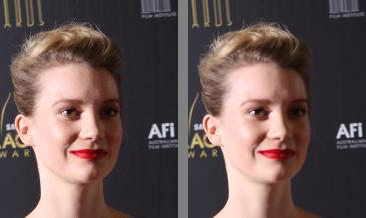

In [17]:
mosaicview(vector_N[number_of_faces], array_N[:,:,number_of_faces]; 
    fillvalue=0.5, npad=10, ncol=2)

## Define a RGB color mean function

In [18]:
# mean color
a1 = RGB{N0f8}(0.5, 0.7, 1); 
a2 = RGB{N0f8}(0.8, 0.6, 1);
a = 0.5 * a1 + 0.5 * a2

### Define mean_RGB function with variable number of arguments 

In [19]:
function mean_RGB(args...)
    
    c = RGB{Float64}(0,0,0)    
    w = 1.0 / length(args)
    for arg in args
       c += w * arg
    end
    
    return RGB{N0f8}(c)
end

mean_RGB (generic function with 1 method)

### Test the mean_RGB function

In [20]:
c1 = RGB{N0f8}(0.5, 0.7, 1); 
c2 = RGB{N0f8}(0.8, 0.6, 1);
c = RGB{N0f8}(0.5 * c1 + 0.5 * c2)

In [21]:
d = mean_RGB(c1,c2)

In [22]:
dump(c)

RGB{N0f8}
  r: N0f8
    i: UInt8 0xa6
  g: N0f8
    i: UInt8 0xa5
  b: N0f8
    i: UInt8 0xff


In [23]:
dump(d)

RGB{N0f8}
  r: N0f8
    i: UInt8 0xa6
  g: N0f8
    i: UInt8 0xa5
  b: N0f8
    i: UInt8 0xff


In [24]:
c == d

true

In [25]:
d1 = [RGB{N0f8}(0.5, 0.7, 1), RGB{N0f8}(0.3, 0.5, 1),
    RGB{N0f8}(0.2, 0.4, 0.8) ]

In [26]:
mean_RGB(d1...)

In [27]:
d2 = [RGB{N0f8}(1, 0, 0), RGB{N0f8}(0, 1, 0), RGB{N0f8}(0, 0, 1) ]

In [28]:
mean_RGB.(d1, d2)

## Compute mean face

### Compute mean face of vector_N

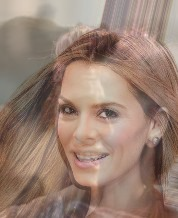

In [29]:
mean_RGB.(vector_N[1], vector_N[2], vector_N[3])

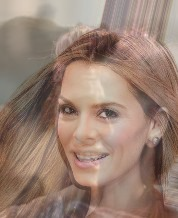

In [30]:
mean_RGB.(vector_N[1:3]...)

 22.558074 seconds (378.21 M allocations: 17.132 GiB, 8.36% gc time, 11.93% compilation time)


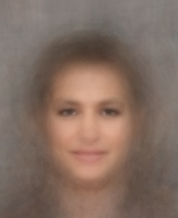

In [31]:
@time vector_mean = mean_RGB.(vector_N...)

### Compute mean face of array_N

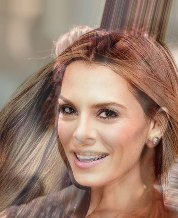

In [32]:
mean_RGB.(array_N[:,:,1], array_N[:,:,2])

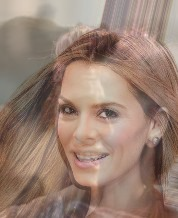

In [33]:
mean_RGB.(array_N[:,:,1], array_N[:,:,2], array_N[:,:,3])

In [ ]:
# This doesn't work !!! (Why?)
mean_RGB.(array_N[:,:,1:3]...)

In [37]:
@time v = [array_N[:,:,i] for i in 1:number_of_faces];

  0.040495 seconds (26.74 k allocations: 12.871 MiB, 85.36% compilation time)


 19.863394 seconds (365.42 M allocations: 16.484 GiB, 7.07% gc time)


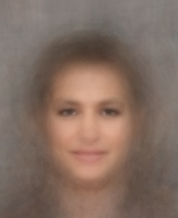

In [38]:
@time array_mean = mean_RGB.(v...)

### Compare the men face results

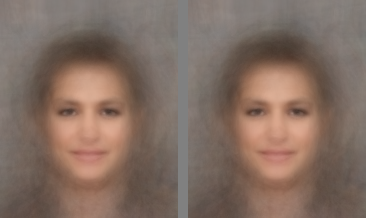

In [39]:
mosaicview(vector_mean, array_mean; fillvalue=0.5, npad=10, 
    ncol= 2)

In [40]:
typeof(vector_mean), size(vector_mean), sizeof(vector_mean)

(Matrix{RGB{N0f8}}, (218, 178), 116412)

In [41]:
typeof(array_mean), size(array_mean), sizeof(array_mean)

(Matrix{RGB{N0f8}}, (218, 178), 116412)

In [42]:
array_mean == vector_mean

true

## Compute mean face of array_N using the `mean` function in the Statistics package

### `mean Functions`

- `mean(itr)`

Compute the mean of all elements in a collection.

If itr contains NaN or missing values, the result is also NaN or missing (missing takes precedence if array contains both). Use the skipmissing function to omit missing entries and compute the mean of non-missing values.


- `mean(f::Function, itr)`

Apply the function f to each element of collection itr and take the mean.
   
   
- `mean(A::AbstractArray; dims)`

- `mean(f::Function, A::AbstractArray; dims)`

Apply the function f to each element of array A and take the mean over dimensions dims.

- `mean!(r, v)`

Compute the mean of v over the singleton dimensions of r, and write results to r.
   



In [ ]:
using Statistics

In [ ]:
typeof(array_N), size(array_N), sizeof(array_N)

In [ ]:
@time mean_face = mean(array_N,dims = 3);

In [ ]:
typeof(mean_face), size(mean_face), sizeof(mean_face)

In [ ]:
typeof(mean_face[:,:,1]), size(mean_face[:,:,1]), sizeof(mean_face[:,:,1])

In [ ]:
mean_face[:,:,1]

### Test first 16 mean faces

In [43]:
Image_Type = Matrix{RGB{N0f8}}

mean_images = Vector{Image_Type}([])

for i in 1:16
    push!(mean_images, mean_RGB.(vector_N[1:i]...))
end

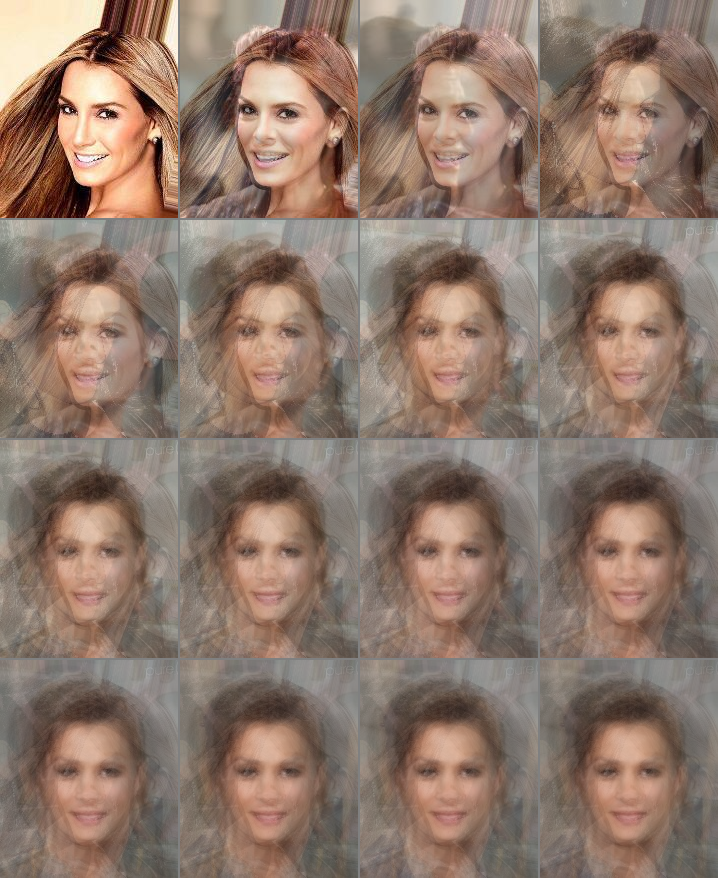

In [44]:
mosaicview(mean_images; fillvalue=0.5, npad=2, ncol=4, rowmajor=true)